# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**NOTE:** This notebook was generated automatically by AI and has not been fully verified. Please review all code and results critically and exercise caution when interpreting any outputs.

This notebook demonstrates how to access, inspect, and visualize data from [Dandiset 001366 version 0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603): "Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification." The Dandiset contains experimental movies of pial vessels in mice, supporting the study of vessel diameter and pulsatility measurement methods.

## Notebook Outline
- Dandiset overview and metadata
- Required Python packages
- Exploring and listing assets via DANDI API
- Loading an NWB file and examining key metadata
- Visualizing vessel imaging data from the "Movies" ImageSeries
- Summarizing image intensity characteristics
- Neurosift interactive exploration link
- Summary and next steps

## Dandiset Overview

| Key        | Value |
|------------|-------|
| **Name**   | Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification |
| **Version**| 0.250324.1603 |
| **DOI**    | [10.48324/dandi.001366/0.250324.1603](https://doi.org/10.48324/dandi.001366/0.250324.1603) |
| **Description** | movies of a pial vessel of mice used in the experiments. |
| **Keywords** | full width at half maximum, vessel pulsation, image analysis, vessel diameter, radon transform |
| **License** | CC-BY-4.0 |
| **Contributors** | Zhao, Yue; Ranjan, Aditya; Wong, Devin T.; Huang, Qinwen; Ghanizada, Hashmat; Nedergaard, Maiken; Kelley, Douglas H.; Boster, Kimberly A. S.; National Institute of Health; United States Army |

See full details at the [Dandiset landing page](https://dandiarchive.org/dandiset/001366/0.250324.1603).

## Required Packages
The following Python packages are required to execute this notebook. It is assumed these are already installed:

- numpy
- matplotlib
- pynwb
- h5py
- remfile
- dandi

_Do not_ use `pip install` commands in this notebook. Please refer to the package documentation for installation instructions if needed.

In [1]:
# Connect to DANDI archive and list assets

from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print high-level metadata
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List first 5 assets in the dandiset
assets = list(islice(dandiset.get_assets(), 5))
print("\nFirst 5 assets:")
for asset in assets:
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


### File Selection

For illustration, we will explore the NWB file:  
**sub-F15/sub-F15_ses-F15BC-19102023_image.nwb**  
Asset ID: `71fa07fc-4309-4013-8edd-13213a86a67d`  

File URL:  
https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/

You may explore this file interactively in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=draft).

In [2]:
# Load and inspect the NWB file

import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Experimenter:", nwb.experimenter)
print("Experiment description:", nwb.experiment_description)
print("Institution:", nwb.institution)
print("Subject description:", nwb.subject.description)
print("Subject ID:", nwb.subject.subject_id)
print("Subject age:", nwb.subject.age)
print("Subject sex:", nwb.subject.sex)
print("Subject strain:", nwb.subject.strain)
print("Session start time:", nwb.session_start_time)

movies = nwb.acquisition['Movies']
print("Movies description:", movies.description)
print("Movies comments:", movies.comments)
print("Movies rate (Hz):", movies.rate)
print("Movies data shape:", movies.data.shape)
print("Movies data dtype:", movies.data.dtype)

Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Experimenter: ('Ghanizada, Hashmat ',)
Experiment description: Vessel diameter and pulsatility measurement.
Institution: University of Copenhagen
Subject description: wild-type mouse
Subject ID: F15
Subject age: P9W/P16W
Subject sex: F
Subject strain: C57BL/6J
Session start time: 2023-10-19 02:00:00-04:00
Movies description: 16-bit grayscale movie of a pial vessel
Movies comments: no comments
Movies rate (Hz): 54.47
Movies data shape: (9553, 214, 132)
Movies data dtype: uint16


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


#### NWB File Structure (Summary)

| Field                   | Value |
|-------------------------|-------|
| **session_description** | a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation. |
| **experimenter**        | ('Ghanizada, Hashmat ',) |
| **institution**         | University of Copenhagen |
| **subject**             | wild-type mouse (F15, C57BL/6J, age: P9W/P16W, sex: F) |
| **acquisition**         | "Movies": ImageSeries (shape: 9553 frames, 214x132 pixels, dtype uint16, rate: 54.47 Hz; comments: no comments) |

The acquisition "Movies" contains a time series of 16-bit grayscale images representing a pial vessel.

### Visualizing Imaging Data

Below, we extract and visualize the first frame of the "Movies" ImageSeries. This represents a 16-bit grayscale image of the vessel acquired at the beginning of the recording.

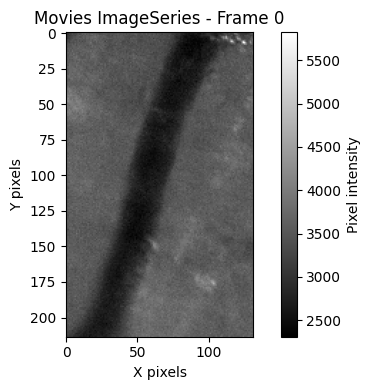

In [3]:
# Visualize frame 0 of the Movies ImageSeries

import matplotlib.pyplot as plt
import numpy as np

frame_0 = movies.data[0, :, :]
plt.figure(figsize=(6,4))
plt.imshow(frame_0, cmap='gray')
plt.title("Movies ImageSeries - Frame 0")
plt.xlabel("X pixels")
plt.ylabel("Y pixels")
plt.colorbar(label="Pixel intensity")
plt.tight_layout()
plt.show()

The frame above visualizes vessel structure imaged in the experiment, emphasizing the main vessel as a prominent feature in the data.

#### Mean Projection (First 100 Frames)

In order to summarize vessel stability and prominent features over time, we compute and show the mean projection over the first 100 frames of the Movie ImageSeries.

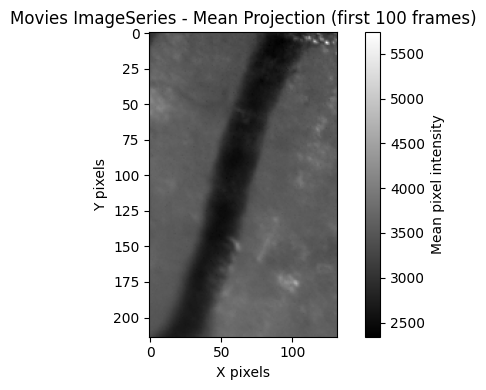

In [4]:
mean_img = np.mean(movies.data[0:100, :, :], axis=0)
plt.figure(figsize=(6,4))
plt.imshow(mean_img, cmap='gray')
plt.title("Movies ImageSeries - Mean Projection (first 100 frames)")
plt.xlabel("X pixels")
plt.ylabel("Y pixels")
plt.colorbar(label="Mean pixel intensity")
plt.tight_layout()
plt.show()

The mean projection image highlights temporally stable and spatially prominent vessel structures during the start of the recording.

#### Pixel Intensity Histogram (Frame 0)

To further characterize the dynamic range and contrast of the image data, we plot a histogram of pixel intensities for frame 0.

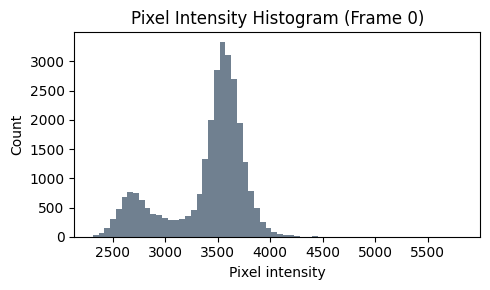

In [5]:
plt.figure(figsize=(5,3))
plt.hist(frame_0.flatten(), bins=64, color='slategray')
plt.title("Pixel Intensity Histogram (Frame 0)")
plt.xlabel("Pixel intensity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The above histogram shows that most pixel values are concentrated between approximately 2700 and 4000, with only a small portion of the full 16-bit range in use. This reflects the particular contrast and exposure characteristics of the experimental setup.

## Interactive Exploration with Neurosift

For further interactive visualization and more advanced analyses, you may open the NWB file in [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=draft).

Neurosift supports browsing, annotation, and investigation of NWB files from the DANDI Archive.

## Summary and Future Directions

This notebook demonstrated how to:

- Find and load Dandiset 001366 data using the DANDI API
- Stream and inspect an NWB file in Python
- Visualize raw imaging data and summarize pixel intensity characteristics

Possible next steps for analysis include:
- Quantitative vessel diameter or pulsatility extraction
- Automated vessel segmentation and temporal analysis
- Detailed investigation of experimental epochs and recording metadata

**Reminder:** All analysis code here was AI-generated and has not been fully reviewed. Please verify any results before drawing conclusions.